# Analisis exploratorio de dataset customer_purchases

1.- Importamos nuestras librerias y cargamos nuestros datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-v0_8')
sns.set_palette('rocket')

train_file = "../../datasets/customer_purchases/customer_purchases_train.csv"
train_file = os.path.abspath(train_file)
train_df = pd.read_csv(train_file)

train_df.info()

print("\nColumnas disponibles:\n", train_df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7289 entries, 0 to 7288
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_id             7289 non-null   int64  
 1   customer_id             7289 non-null   object 
 2   customer_date_of_birth  7289 non-null   object 
 3   customer_gender         5738 non-null   object 
 4   customer_signup_date    7289 non-null   object 
 5   item_id                 7289 non-null   object 
 6   item_title              7289 non-null   object 
 7   item_category           7289 non-null   object 
 8   item_price              7289 non-null   float64
 9   item_img_filename       7289 non-null   object 
 10  item_avg_rating         7244 non-null   float64
 11  item_num_ratings        7289 non-null   int64  
 12  item_release_date       7289 non-null   object 
 13  purchase_timestamp      7289 non-null   object 
 14  customer_item_views     7289 non-null   

2.- Vemos que datos tenemos, los tipos de datos, y vemos los datos faltantes de cada columna de nuestro train


In [ ]:
train_df.info()

# tamaño del dataframe
print(f"\nFilas: {train_df.shape[0]}, Columnas: {train_df.shape[1]}\n")

print("Datos faltantes:")
missing = train_df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7289 entries, 0 to 7288
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_id             7289 non-null   int64  
 1   customer_id             7289 non-null   object 
 2   customer_date_of_birth  7289 non-null   object 
 3   customer_gender         5738 non-null   object 
 4   customer_signup_date    7289 non-null   object 
 5   item_id                 7289 non-null   object 
 6   item_title              7289 non-null   object 
 7   item_category           7289 non-null   object 
 8   item_price              7289 non-null   float64
 9   item_img_filename       7289 non-null   object 
 10  item_avg_rating         7244 non-null   float64
 11  item_num_ratings        7289 non-null   int64  
 12  item_release_date       7289 non-null   object 
 13  purchase_timestamp      7289 non-null   object 
 14  customer_item_views     7289 non-null   

purchase_item_rating    5745
customer_gender         1551
item_avg_rating           45
dtype: int64

: 

: 

: 

3.- Estadisticas y distribuciones categoricas

In [ ]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
purchase_id,7289.0,NaN,NaN,NaN,3843.890108,2210.60654,0.0,1907.0,3890.0,5772.0,7614.0
customer_id,7289,500,CUST_0151,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_date_of_birth,7289,491,1972-09-17,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_gender,5738,2,female,2878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_signup_date,7289,404,2025-05-26,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_id,7289,384,ITEM_0044,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_title,7289,219,Step Up Your Style With Stylish Blouse,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_category,7289,10,shoes,1504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_price,7289.0,NaN,NaN,NaN,1319.936581,663.925169,104.17,778.05,1294.96,1554.72,2998.64
item_img_filename,7289,8,imgbl.jpg,1820,NaN,NaN,NaN,NaN,NaN,NaN,NaN


: 

: 

: 

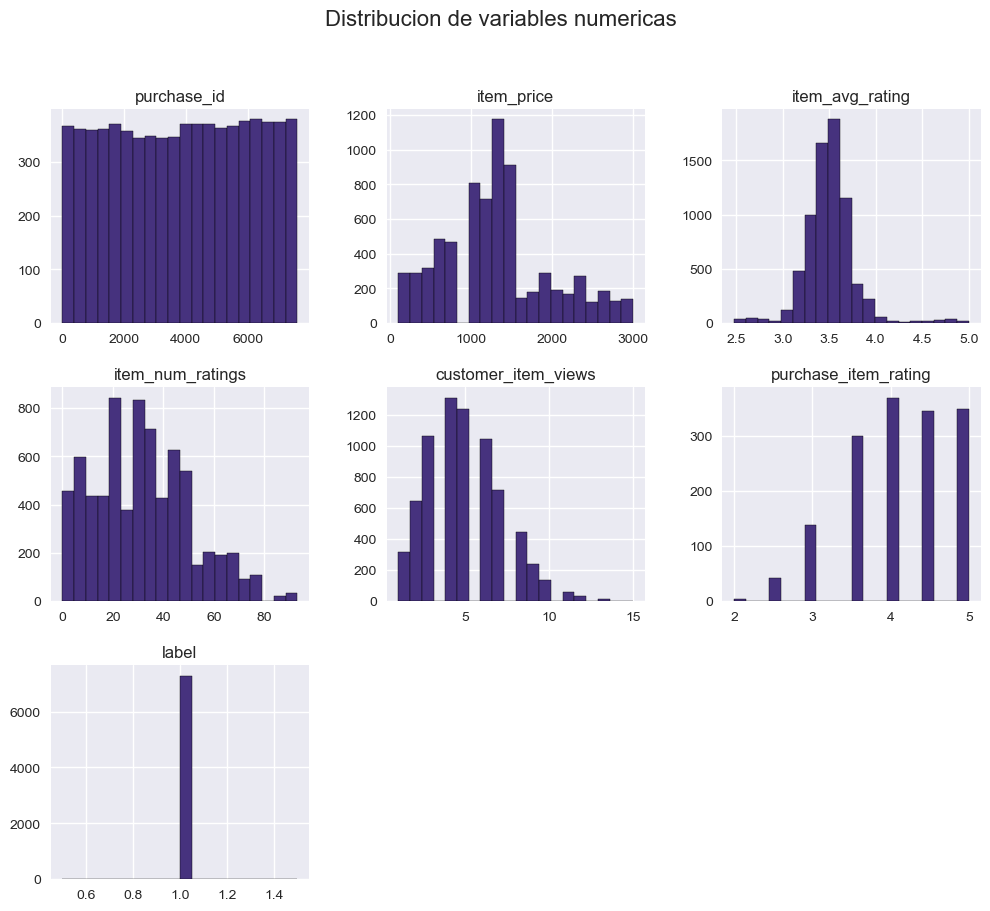

: 

: 

: 

In [ ]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
train_df[num_cols].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Distribucion de variables numericas', fontsize=16)
plt.show()

<Figure size 800x550 with 0 Axes>

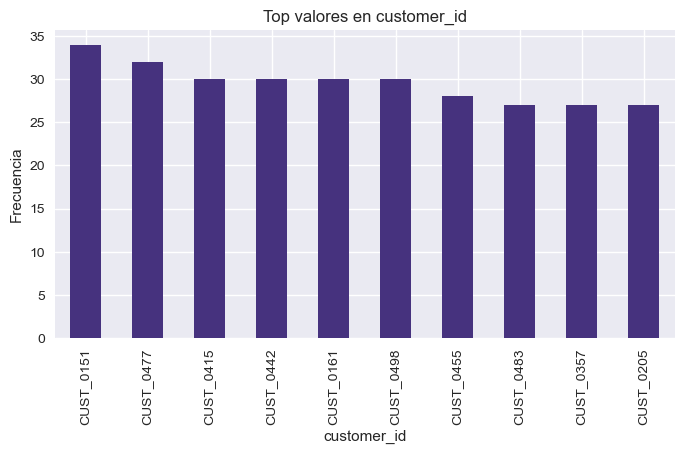

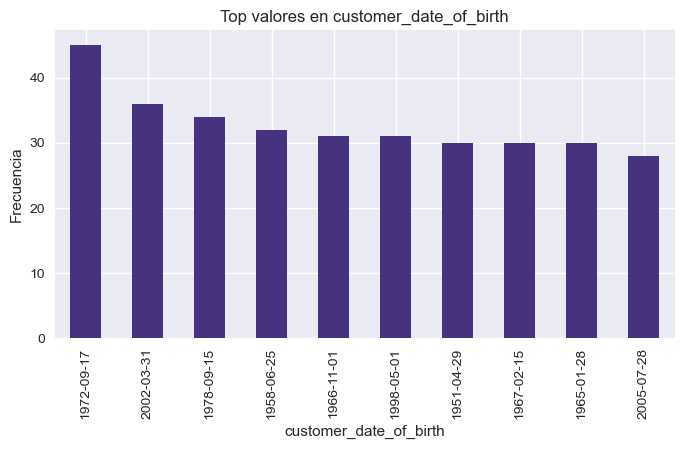

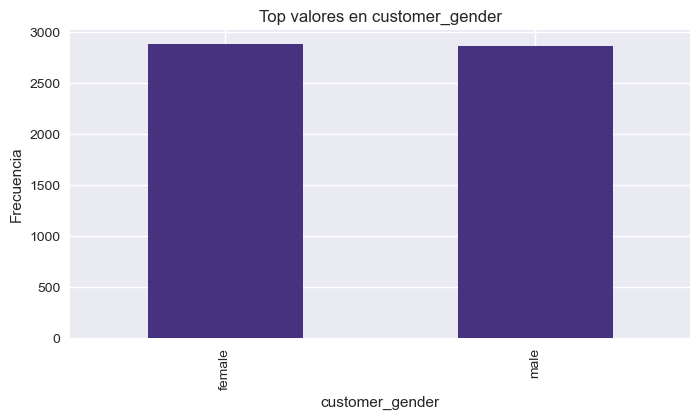

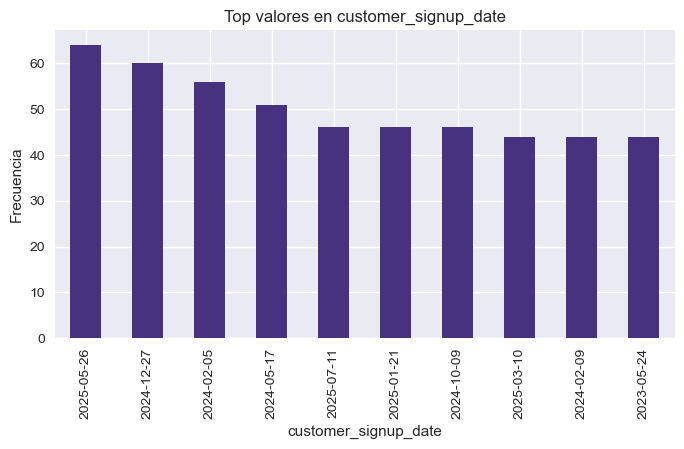

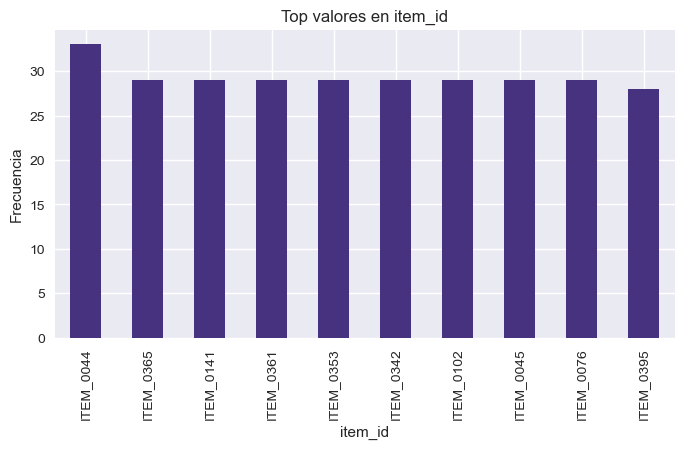

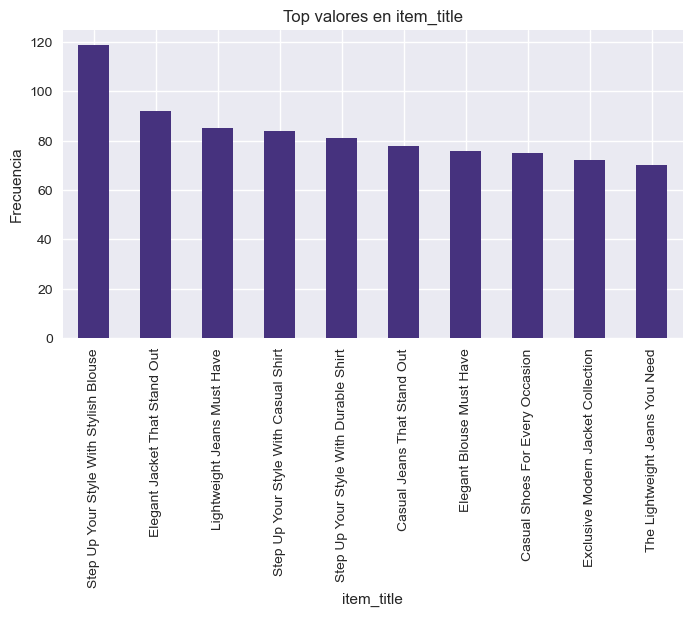

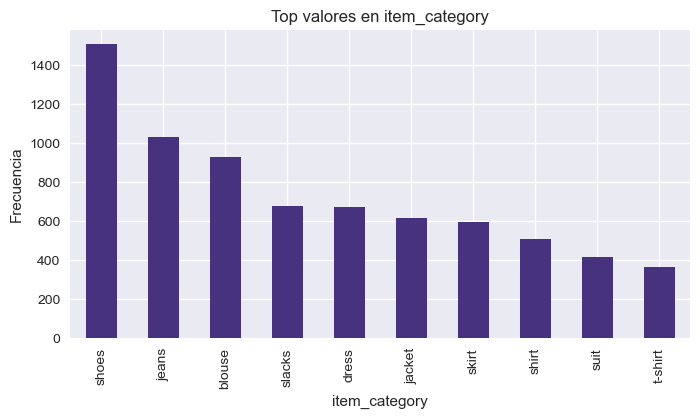

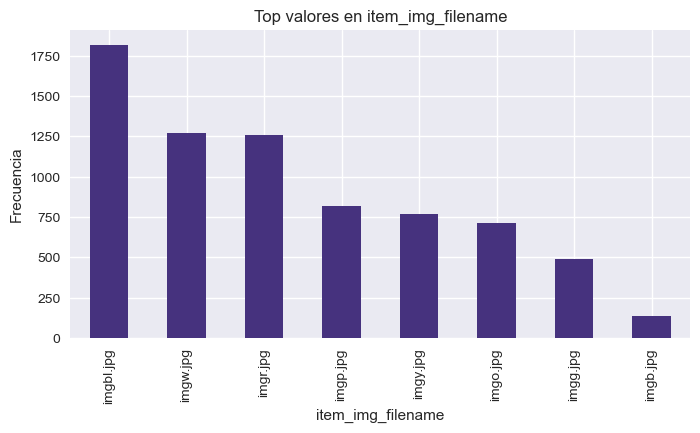

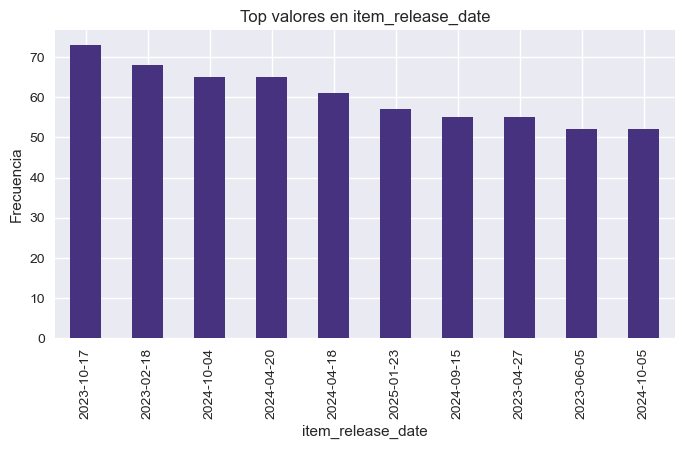

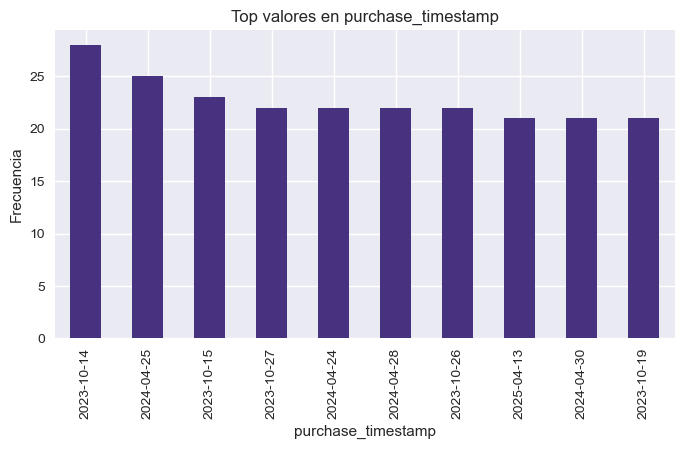

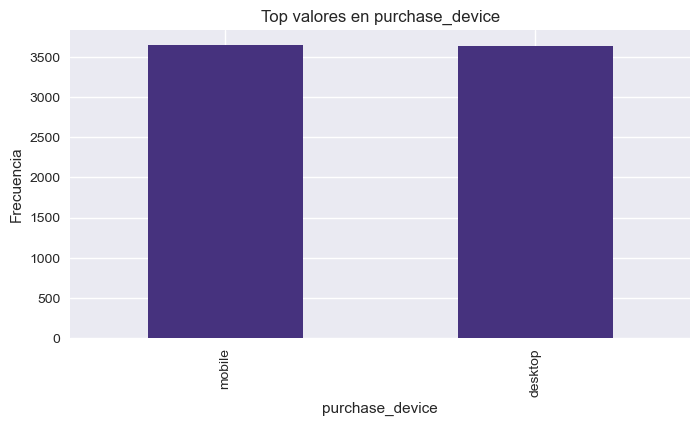

: 

: 

: 

In [ ]:
plt.suptitle('Distribucion de variables categoricas', fontsize=16)
cat_cols = train_df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    train_df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top valores en {col}")
    plt.ylabel("Frecuencia")
    plt.show()

4.- Correlaciones entre variables numericas

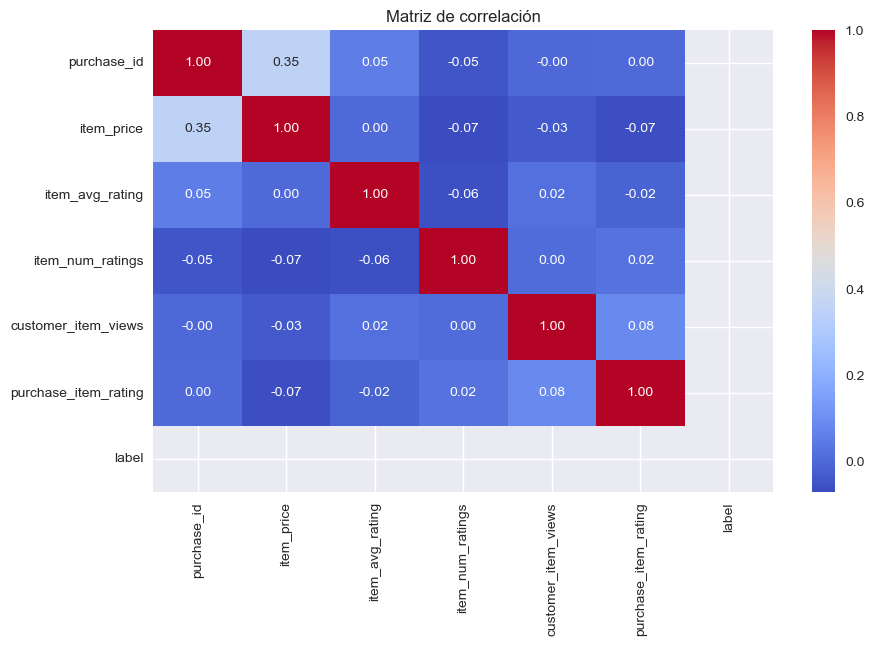

: 

: 

: 

In [ ]:
corr = train_df[num_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

5.- Pequeño analisis 

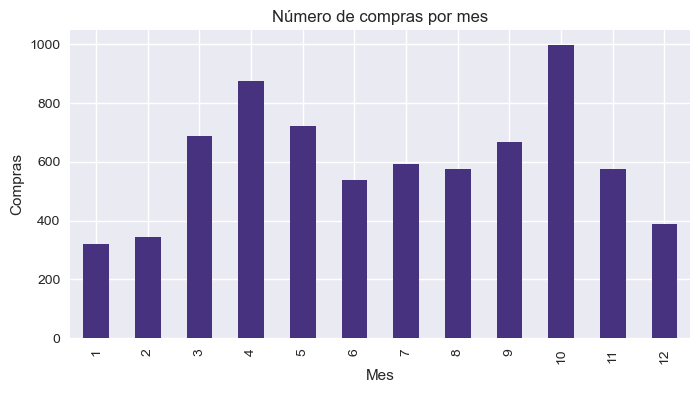

: 

: 

: 

In [ ]:
train_df['purchase_timestamp'] = pd.to_datetime(train_df['purchase_timestamp'])
train_df['purchase_month'] = train_df['purchase_timestamp'].dt.month

plt.figure(figsize=(8,4))
train_df['purchase_month'].value_counts().sort_index().plot(kind='bar')
plt.title("Número de compras por mes")
plt.xlabel("Mes")
plt.ylabel("Compras")
plt.show()

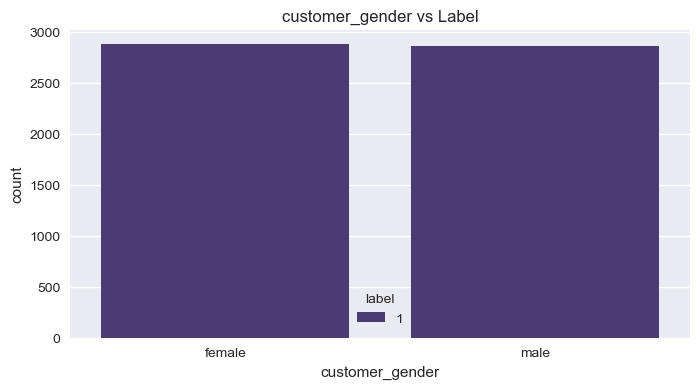

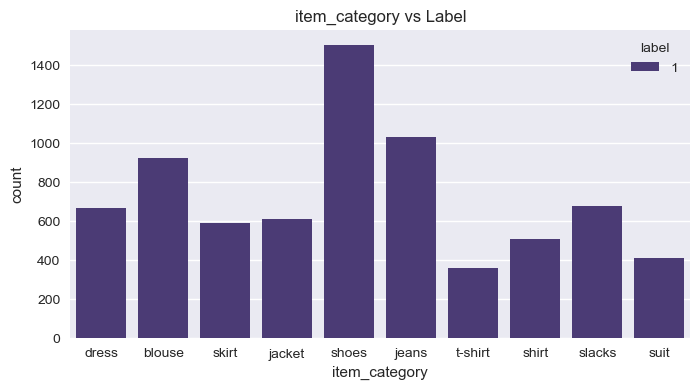

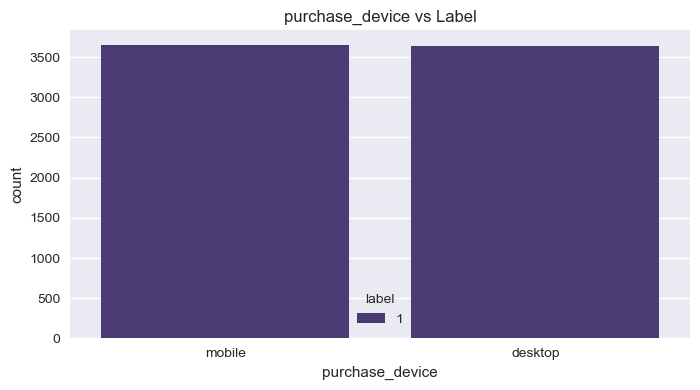

: 

: 

: 

In [ ]:
if 'label' in train_df.columns:
    for col in ['customer_gender', 'item_category', 'purchase_device']:
        plt.figure(figsize=(8,4))
        sns.countplot(data=train_df, x=col, hue='label')
        plt.title(f'{col} vs Label')
        plt.show()

Edad y antiguedad de los clientes


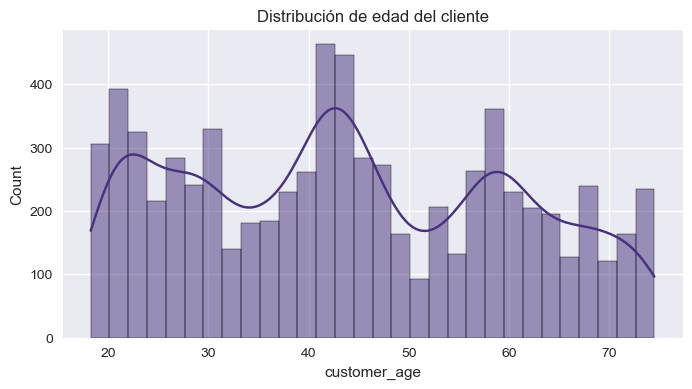

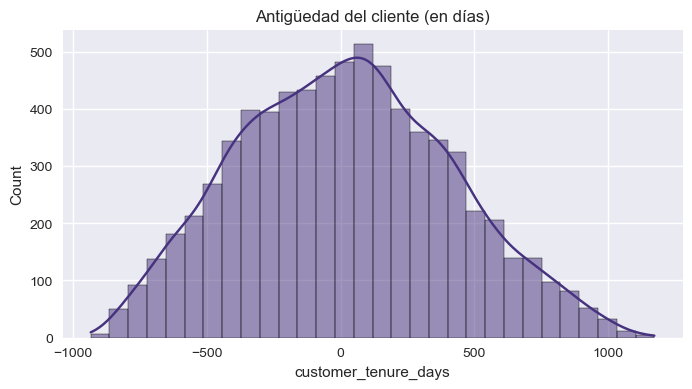

: 

: 

: 

In [ ]:
from datetime import datetime

train_df['customer_date_of_birth'] = pd.to_datetime(train_df['customer_date_of_birth'])
train_df['customer_signup_date'] = pd.to_datetime(train_df['customer_signup_date'])
train_df['customer_age'] = (datetime.now() - train_df['customer_date_of_birth']).dt.days / 365
train_df['customer_tenure_days'] = (train_df['purchase_timestamp'] - train_df['customer_signup_date']).dt.days

plt.figure(figsize=(8,4))
sns.histplot(train_df['customer_age'], bins=30, kde=True)
plt.title('Distribución de edad del cliente')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(train_df['customer_tenure_days'], bins=30, kde=True)
plt.title('Antigüedad del cliente (en días)')
plt.show()